In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

# Reading Tweets Dataset

In [132]:
Df_tweets=pd.read_csv(r'C:\\Users\\SRAVAN NEELI\\Desktop\\DAIICT\\Data Mining\\Tweets.csv')
Df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Tweet_coord attribute,negativereason_gold and airline_sentiment_gold are redudant in the dataset which are of no use for processing the data

In [133]:
del Df_tweets['tweet_coord']
del Df_tweets['airline_sentiment_gold']
del Df_tweets['negativereason_gold']

In [134]:
'''The tweets collected were for six major US Airlines that are 
        1.United
        2.U.S.Airways
        3.Southwest
        4.Delta
        5.Virgin America
        6.American'''
Df_tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [135]:
'''Now we consider the Label field of the data set which refers whether the tweet is  POSITIVE ,NEUTRAL AND NEGATIVE'''
Label_count=Df_tweets['airline_sentiment'].value_counts()
Label_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Sentiments')

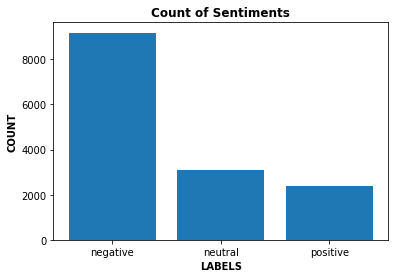

In [136]:
'''Visualising the Count of Labelled Data '''
Index = [1,2,3]
plt.bar(Index,Label_count)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('COUNT',fontweight='bold')
plt.xlabel('LABELS',fontweight='bold')
plt.title('Count of Sentiments',fontweight='extra bold')

# Preprocess data for classification

In [137]:
import re
import nltk
from nltk.corpus import stopwords

In [138]:
# In this function we are removing stop words, '@' '#' characters 
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [139]:
# In this function we are actually again doing cleaning and just measuring the length of the words
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [140]:
'''converting positive,neutral to 1 and negative to 0 by adding another column'''
Df_tweets['sentiment']=Df_tweets['airline_sentiment'].apply(lambda x: -1 if x=='negative' else 1)
Df_tweets['sentiment'].head()

0    1
1    1
2    1
3   -1
4   -1
Name: sentiment, dtype: int64

In [141]:
'''creating new column CLEAN_TWEET in which we store the cleaned tweets list of words'''
Df_tweets['clean_tweet']=Df_tweets['text'].apply(lambda x: tweet_to_words(x))
Df_tweets['clean_tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: clean_tweet, dtype: object

In [142]:
Df_tweets['Tweet_length']=Df_tweets['text'].apply(lambda x: clean_tweet_length(x))
Df_tweets['Tweet_length'].head()

0     3
1     6
2     8
3    11
4     5
Name: Tweet_length, dtype: int64

In [143]:
train,test = train_test_split(Df_tweets,test_size=0.2,random_state=42)

In [144]:
''' Making list of all tweets,each member of the list is cleaned tweet '''
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

In [145]:
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_features = tfidf.fit_transform(train_clean_tweet)
test_features=tfidf.fit_transform(test_clean_tweet)

In [147]:
def svm_function(x,y):
        #initilizing weight
        w = np.zeros(len(x[0]))
         #initialize learning rate
        l_rate = 1
         #epoch
        epoch = 10000
         #output list
        out = []
         #training svm
        for e in range(epoch):
            for i, val in enumerate(x):
                val1 = np.dot(x[i], w)
                if (y[i]*val1 < 1):
                     w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
                else:
                     w = w + l_rate * (-2*(1/epoch)*w)
        for i, val in enumerate(x):
             out.append(np.dot(x[i], w))
        return w, out

In [148]:
w,out=svm_function(train_features.toarray(),np.array(train['sentiment']))

In [149]:
test_features=test_features.toarray()

In [150]:
test_features.shape

(2928, 5298)

In [151]:
train_features=train_features.toarray()

In [152]:
index = list(range(len(test_features[0,:]),len(train_features[0,:])))

In [153]:
w=np.delete(w,index)

In [154]:
w=w.reshape(len(w),1)

In [155]:
w.shape

(5298, 1)

In [156]:
predictions=[]
for i in range(len(test_features[:,0])):
    t=test_features[i,:]
    t=t.reshape(len(t),1)
    y_pred=np.dot(w.T,t1)
    if(y_pred > 1):
        predictions.append(1)
    else:
        predictions.append(-1)    

In [157]:
from sklearn.metrics import accuracy_score
print(accuracy_score(list(test['sentiment']),predictions))

0.6451502732240437
